<a href="https://colab.research.google.com/github/Atfssene/FRASA/blob/main/DNN_Logistic_Regression_FRASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load extracted CSV

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
url = "https://raw.githubusercontent.com/Atfssene/FRASA/main/Text%20Summarization/"

In [ ]:
train = tf.keras.utils.get_file('extracted_train.csv', url+'/extracted_train.csv')
test = tf.keras.utils.get_file('extracted_test.csv', url+'/extracted_test.csv')

# train_df = pd.read_csv(train, converters={'TextRank_order':eval,'SumBasic_order':eval,'labels':eval})
# test_df = pd.read_csv(test, converters={'TextRank_order':eval,'SumBasic_order':eval,'labels':eval})

train_df = pd.read_csv(train, converters={'labels':eval,'TextRank':eval,'TextRank_order':eval,'SumBasic':eval,'SumBasic_order':eval, 'Sentence_length':eval})
test_df = pd.read_csv(test, converters={'labels':eval,'TextRank':eval,'TextRank_order':eval,'SumBasic':eval,'SumBasic_order':eval, 'Sentence_length':eval})

train_df.info()
# df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15012 entries, 0 to 15011
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TextRank         15012 non-null  object
 1   TextRank_order   15012 non-null  object
 2   SumBasic         15012 non-null  object
 3   SumBasic_order   15012 non-null  object
 4   Sentence_length  15012 non-null  object
 5   labels           15012 non-null  object
dtypes: object(6)
memory usage: 703.8+ KB


In [ ]:
train_df.head()

,TextRank,TextRank_order,SumBasic,SumBasic_order,Sentence_length,labels
0,"[0.05728266350245769, 0.060217967487530125, 0....","[7, 2, 1, 15, 4, 10, 9, 3, 12, 14, 6, 13, 5, 8...","[4.727272727272726, 3.909090909090908, 4.09090...","[1, 4, 2, 12, 17, 18, 11, 5, 13, 14, 9, 10, 7,...","[15, 15, 15, 9, 7, 7, 11, 14, 4, 7, 7, 8, 11, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0.0261382833708017, 0.025636169407549904, 0.0...","[10, 17, 22, 21, 16, 6, 37, 20, 15, 2, 24, 31,...","[2.2999999999999994, 1.6500000000000001, 0.850...","[15, 19, 33, 20, 14, 13, 2, 18, 23, 6, 11, 38,...","[16, 8, 7, 9, 19, 16, 5, 16, 12, 20, 7, 12, 15...","[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,"[0.04179513273589544, 0.042132600581690965, 0....","[14, 10, 19, 5, 22, 6, 12, 8, 13, 1, 16, 17, 9...","[5.111111111111111, 2.9444444444444438, 5.4999...","[5, 12, 3, 1, 22, 8, 9, 6, 13, 10, 7, 24, 19, ...","[16, 15, 20, 26, 10, 16, 13, 11, 13, 18, 16, 1...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0.09797460546421852, 0.10349622916295231, 0.0...","[6, 3, 8, 7, 9, 1, 2, 10, 4, 5, 11]","[7.800000000000002, 6.6000000000000005, 1.0, 1...","[1, 3, 10, 8, 6, 2, 4, 9, 5, 7, 11]","[20, 18, 5, 5, 13, 15, 11, 5, 9, 9, 0]","[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
4,"[0.07450063386236778, 0.0889736980261805, 0.08...","[10, 1, 7, 12, 6, 4, 5, 8, 11, 9, 2, 3, 13]","[1.9230769230769231, 3.846153846153846, 2.1538...","[8, 4, 7, 12, 9, 5, 2, 6, 11, 10, 1, 3, 13]","[13, 13, 11, 3, 11, 17, 32, 7, 4, 9, 39, 22, 0]","[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"


Normalizing TextRank and SumBasic weight

In [ ]:
def normalization(list_weight):
  norm = np.array(list_weight)
  norm = norm.reshape(1,-1)
  norm = preprocessing.normalize(norm)
  norm = [item for sublist in norm for item in sublist]
  return norm
def convert_label(cols, axis):
  count = sum([x for x in cols['labels'] if x == 1])
  labels = []
  for x in cols[axis]:
    if x <= count:
      labels.append(1)
    else:
      labels.append(0)
  return labels

In [ ]:
train_df['TextRank'] = train_df.apply(lambda row: normalization(row['TextRank']), axis=1)
train_df['SumBasic'] = train_df.apply(lambda row: normalization(row['SumBasic']), axis=1)
test_df['TextRank'] = test_df.apply(lambda row: normalization(row['TextRank']), axis=1)
test_df['SumBasic'] = test_df.apply(lambda row: normalization(row['SumBasic']), axis=1)
train_df['Sentence_order'] = train_df.apply(lambda row: [x+1 for x,y in enumerate(row['TextRank'])], axis=1)
test_df['Sentence_order'] = test_df.apply(lambda row: [x+1 for x,y in enumerate(row['TextRank'])], axis=1)
train_df['TR'] = train_df.apply(lambda row: convert_label(row,'TextRank_order'), axis=1)
train_df['SB'] = train_df.apply(lambda row: convert_label(row,'SumBasic_order'), axis=1)
test_df['TR'] = test_df.apply(lambda row: convert_label(row,'TextRank_order'), axis=1)
test_df['SB'] = test_df.apply(lambda row: convert_label(row,'SumBasic_order'), axis=1)

## Flatten data

We will add Sum column from TextRank and SumBasic.

In [ ]:
columns = ["TextRank", "TextRank_order", "SumBasic", "SumBasic_order", "Sum", "Sentence_order", "Sentence_length", "TR", "SB", "labels"]

flat_train = pd.DataFrame(columns=columns)
flat_test = pd.DataFrame(columns=columns)

for column in columns:
  if column == 'Sum':
    flat_train[column] = (flat_train['TextRank_order'] + flat_train['SumBasic_order']) /2
    flat_test[column] = (flat_test['TextRank_order'] + flat_test['SumBasic_order']) /2
  else:
    flat_train[column] = pd.to_numeric(train_df.explode(column, ignore_index=True)[column])
    flat_test[column] = pd.to_numeric(test_df.explode(column, ignore_index=True)[column])
flat_test

,TextRank,TextRank_order,SumBasic,SumBasic_order,Sum,Sentence_order,Sentence_length,TR,SB,labels
0,0.255595,1,3.651024e-01,3,2.0,1,23,1,1,0
1,0.245727,3,3.651024e-01,2,2.5,2,16,1,1,1
2,0.240186,8,1.904882e-01,10,9.0,3,13,0,0,0
3,0.246813,2,2.857323e-01,4,3.0,4,11,1,1,1
4,0.243691,6,2.539843e-01,5,5.5,5,17,0,0,0
...,...,...,...,...,...,...,...,...,...,...
66654,0.205191,10,1.554131e-01,13,11.5,25,6,0,0,0
66655,0.176446,23,5.827990e-02,22,22.5,26,4,0,0,0
66656,0.179090,21,1.942663e-02,26,23.5,27,2,0,0,0
66657,0.147998,26,2.913995e-02,25,25.5,28,3,0,0,0


In [ ]:
flat_test.isnull().any()

TextRank           False
TextRank_order     False
SumBasic           False
SumBasic_order     False
Sum                False
Sentence_order     False
Sentence_length    False
TR                 False
SB                 False
labels             False
dtype: bool

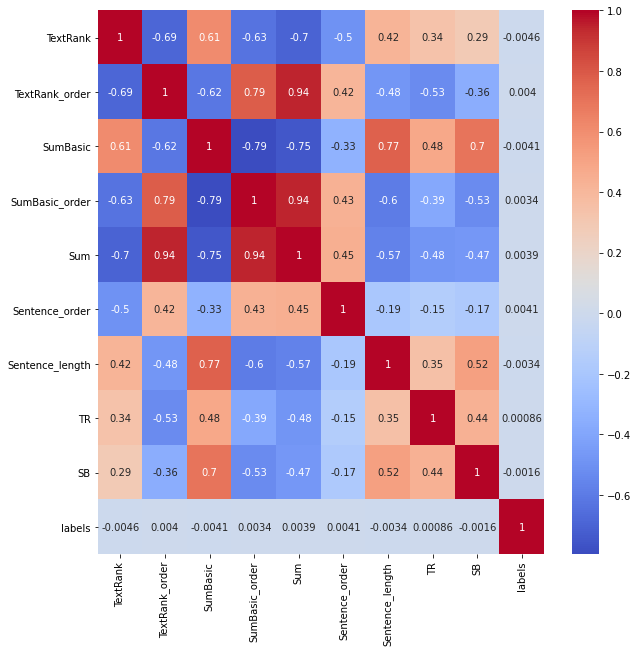

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
_ = sns.heatmap(flat_train.corr(), cmap='coolwarm', annot=True)

In [ ]:
data = flat_train['Sum']
data_mean, data_std = data.mean(axis=0), data.std(axis=0)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(lower, upper)
outliers = [x for x in data if x < lower or x > upper]
print(outliers)
outliers_removed = [x for x in data if x > lower and x < upper]

-11.898704592890493 34.15991335835518
[34.5, 36.5, 38.5, 35.5, 38.5, 35.0, 35.5, 40.0, 36.0, 44.0, 45.0, 37.0, 40.5, 37.5, 35.0, 36.5, 34.5, 38.5, 36.0, 35.0, 35.0, 36.0, 35.0, 40.5, 36.0, 45.5, 48.0, 48.5, 42.5, 38.5, 37.5, 39.0, 48.5, 36.5, 40.5, 36.5, 45.0, 52.5, 37.5, 35.5, 38.5, 47.5, 52.5, 39.5, 38.5, 37.5, 34.5, 37.0, 35.5, 36.5, 39.0, 55.5, 46.5, 55.0, 36.0, 46.5, 43.5, 44.5, 34.5, 49.0, 49.5, 56.0, 40.5, 38.5, 36.5, 45.0, 50.0, 50.5, 50.0, 52.0, 37.5, 37.5, 36.0, 37.5, 39.5, 42.5, 41.0, 39.5, 43.0, 40.5, 47.0, 41.0, 37.5, 42.5, 36.0, 39.5, 45.0, 38.5, 37.5, 36.0, 37.0, 38.5, 41.5, 39.0, 39.0, 34.5, 39.0, 40.5, 38.5, 36.5, 41.5, 42.0, 35.0, 37.0, 37.0, 36.0, 43.0, 36.0, 36.5, 43.0, 36.0, 43.0, 41.0, 38.5, 43.5, 43.5, 35.0, 38.0, 34.5, 40.5, 42.5, 35.5, 34.5, 35.5, 44.5, 39.5, 46.0, 39.5, 43.0, 45.5, 45.0, 41.5, 39.5, 37.0, 41.5, 42.5, 38.5, 38.0, 37.5, 36.5, 37.0, 38.5, 34.5, 51.5, 41.5, 46.0, 35.5, 42.5, 47.5, 48.5, 47.5, 39.0, 42.5, 51.5, 48.0, 37.5, 35.5, 42.5, 35.0, 36.0, 3

In [ ]:
flat_train = flat_train[~flat_train.Sum.isin(outliers)]

In [ ]:
flat_train

,TextRank,TextRank_order,SumBasic,SumBasic_order,Sum,Sentence_order,Sentence_length,TR,SB,labels
0,0.242559,7,4.162398e-01,1,4.0,1,15,0,1,0
1,0.254988,2,3.441983e-01,4,3.0,2,15,1,0,1
2,0.256001,1,3.602075e-01,2,1.5,3,15,1,1,1
3,0.220594,15,1.761015e-01,12,13.5,4,9,0,0,1
4,0.247298,4,9.605534e-02,17,10.5,5,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...
268914,0.208422,2,3.075074e-01,3,2.5,24,21,1,1,0
268915,0.194041,15,1.590555e-01,15,15.0,25,9,0,0,0
268916,0.203506,6,2.438852e-01,5,5.5,26,14,0,0,0
268917,0.189631,16,4.771666e-02,25,20.5,27,6,0,0,0


In [ ]:
import altair as alt
sample = flat_train.sample(5000)
alt.Chart(sample).mark_circle().encode(
    x='TextRank_order',
    y='SumBasic_order',
    color='labels'
)

alt.Chart(...)

## Normalization

In [ ]:
target_column = 'labels'
feature_columns = ['Sum', 'Sentence_order',"Sentence_length"] #flat_train.columns.values[:-1]
# feature_columns = ['TextRank_order', 'SumBasic_order', 'Sum', 'Sentence_order',"Sentence_length"] #flat_train.columns.values[:-1]
# feature_columns = 'sum'

flat_train.loc[:, feature_columns] = ((flat_train[feature_columns] - flat_train[feature_columns].min()) / (flat_train[feature_columns].max() - flat_train[feature_columns].min()))
flat_test.loc[:, feature_columns] = ((flat_test[feature_columns] - flat_test[feature_columns].min()) / (flat_test[feature_columns].max() - flat_test[feature_columns].min()))

flat_train.describe()

,TextRank,TextRank_order,SumBasic,SumBasic_order,Sum,Sentence_order,Sentence_length,TR,SB,labels
count,265218.000000,265218.000000,2.652180e+05,265218.000000,265218.000000,265218.000000,265218.000000,265218.000000,265218.000000,265218.000000
mean,0.230080,10.714721,2.051814e-01,10.713300,0.294364,0.134009,0.059285,0.194644,0.194644,0.186692
std,0.058929,7.316254,1.202867e-01,7.309192,0.206770,0.105190,0.032670,0.395927,0.395927,0.389665
min,0.023624,1.000000,3.016877e-09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195640,5.000000,1.176119e-01,5.000000,0.136364,0.054054,0.037433,0.000000,0.000000,0.000000
50%,0.228726,9.000000,1.908443e-01,9.000000,0.257576,0.108108,0.053476,0.000000,0.000000,0.000000
75%,0.263744,15.000000,2.762405e-01,15.000000,0.409091,0.189189,0.074866,0.000000,0.000000,0.000000
max,1.000000,58.000000,1.000000e+00,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split Train and Validation

In [ ]:
flat_test

,TextRank,TextRank_order,SumBasic,SumBasic_order,Sum,Sentence_order,Sentence_length,TR,SB,labels
0,0.255595,1,3.651024e-01,3,0.015152,0.000000,0.175573,1,1,0
1,0.245727,3,3.651024e-01,2,0.022727,0.014925,0.122137,1,1,1
2,0.240186,8,1.904882e-01,10,0.121212,0.029851,0.099237,0,0,0
3,0.246813,2,2.857323e-01,4,0.030303,0.044776,0.083969,1,1,1
4,0.243691,6,2.539843e-01,5,0.068182,0.059701,0.129771,0,0,0
...,...,...,...,...,...,...,...,...,...,...
66654,0.205191,10,1.554131e-01,13,0.159091,0.358209,0.045802,0,0,0
66655,0.176446,23,5.827990e-02,22,0.325758,0.373134,0.030534,0,0,0
66656,0.179090,21,1.942663e-02,26,0.340909,0.388060,0.015267,0,0,0
66657,0.147998,26,2.913995e-02,25,0.371212,0.402985,0.022901,0,0,0


In [ ]:
feature_columns = ['TextRank_order', 'SumBasic_order', 'Sum', 'Sentence_order',"Sentence_length"]
x_train, x_val, y_train, y_val = train_test_split(
    flat_train[feature_columns], flat_train[target_column], test_size=0.01, stratify=flat_train[target_column])
x_test = flat_test[feature_columns]
y_test = flat_test[target_column]

x_train.shape, x_val.shape, x_test.shape, y_test.shape

((262565, 5), (2653, 5), (66659, 5), (66659,))

# Neural Network

In [ ]:
NUMERIC_COLUMNS = ['Sum', 'Sentence_order',"Sentence_length"]
CATEGORICAL_COLUMNS = ['TextRank_order', 'SumBasic_order']
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = flat_train[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

## Model

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(x_train, y_train)
eval_input_fn = make_input_fn(x_val, y_val, num_epochs=1, shuffle=False)
test_input_fn = make_input_fn(x_test, y_test, num_epochs=1, shuffle=False)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.81341875, 'accuracy_baseline': 0.81341875, 'auc': 0.48108894, 'auc_precision_recall': 0.17647043, 'average_loss': 0.48199406, 'label/mean': 0.18658122, 'loss': 0.481972, 'precision': 0.0, 'prediction/mean': 0.18558337, 'recall': 0.0, 'global_step': 82060}


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptzmgx7y0/model.ckpt-82060
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


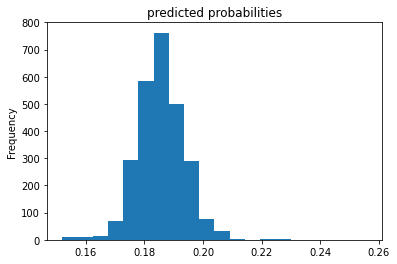

In [ ]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptzmgx7y0/model.ckpt-82060
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


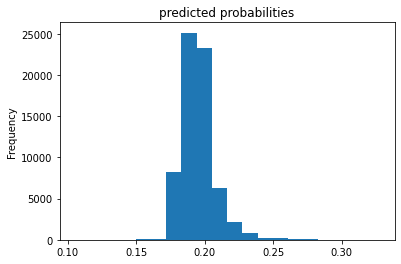

In [ ]:
pred_dicts = list(linear_est.predict(test_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

(0.0, 1.05)

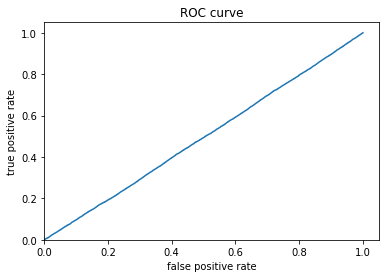

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

## NN

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(64, activation='relu', input_shape=[5]),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    # tf.keras.layers.Dense(1, activation='softmax')
                                    ])

# model.compile(optimizer = RMSprop(lr=0.000001), 
model.compile(optimizer = 'Adam',
              # loss = 'mean_absolute_error',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    validation_data=(x_val, y_val),
                    callbacks = [callbacks],
                    verbose=0)

Epoch 00010: early stopping


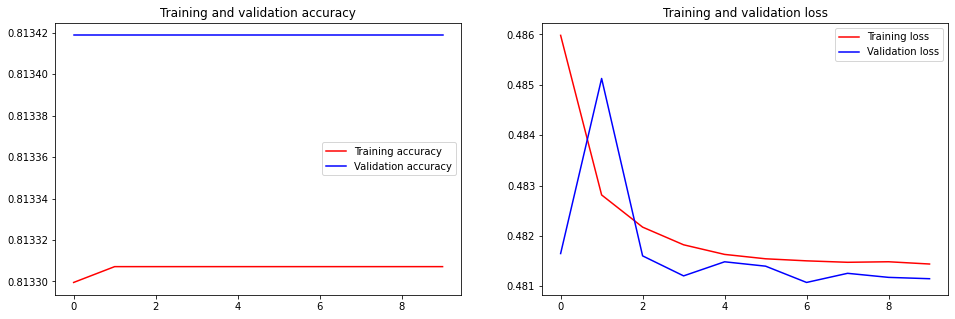

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.subplot(1,2,2)
loss = history.history['loss']
val_loss = history.history['val_loss']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

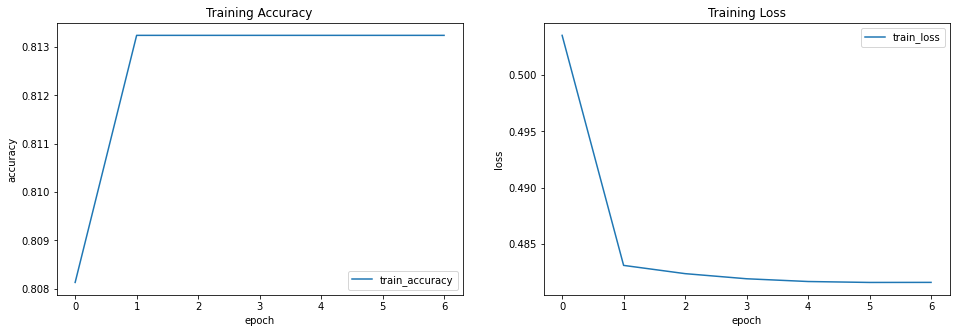

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='best')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'], loc='best')

## Test Predict & Evaluate

In [ ]:
print("Evaluate on test data")
model.evaluate(x_test, y_test)

Evaluate on test data
2084/2084 [==============================] - 2s 887us/step - loss: 0.4864 - accuracy: 0.8099


[0.48644202947616577, 0.8099281191825867]

Threshold

[[0.1860148 ]
 [0.18405503]
 [0.18405503]
 [0.1848256 ]
 [0.18405503]
 [0.18405503]
 [0.18405503]
 [0.18405503]
 [0.18405503]
 [0.18405503]]
0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    1
8    0
9    0
Name: labels, dtype: int64


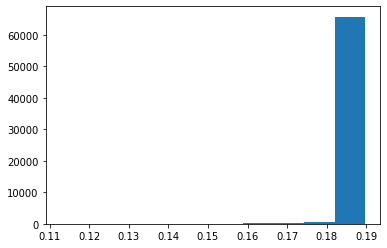

In [ ]:
# Try to predict
test_predict = model.predict(x_test)
# plt.xlim(xmin=0.15, xmax = 0.2)
_ = plt.hist(test_predict)

# SET THRESHOLD
threshold = 0.5 #1.5953099e-04
print(test_predict[:10])
print(y_test[:10])

In [ ]:
predictions=[]
for x in test_predict:
  if x > threshold:
    predictions.append(1)
  else:
    predictions.append(0)

## Linear

In [ ]:
probs.median(axis=0)

0.19419381022453308

In [ ]:
from sklearn.metrics import accuracy_score

threshold = 0.203 #0.1887
predictions=[]
for x in probs:
  if x > threshold:
    predictions.append(1)
  else:
    predictions.append(0)

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

# pay attention to False Positive/Negative

print('True Positive: ', tp)
print('True Negative: ', tn)

print('False Positive: ', fp)
print('False Negative: ', fn)
print(accuracy_score(y_test, predictions))

# nilai threshold dari NN. akurasi = 43%

True Positive:  2418
True Negative:  43256
False Positive:  10733
False Negative:  10252
0.6851887967116218


Text Rank Accuracy

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, flat_test['TR']).ravel()

print('True Positive: ', tp)
print('True Negative: ', tn)
print('False Positive: ', fp)
print('False Negative: ', fn)
print(accuracy_score(y_test, flat_test['TR']))

True Positive:  2557
True Negative:  43563
False Positive:  10426
False Negative:  10113
0.6918795661501073


Sum Basic Accuracy

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, flat_test['SB']).ravel()

print('True Positive: ', tp)
print('True Negative: ', tn)
print('False Positive: ', fp)
print('False Negative: ', fn)
print(accuracy_score(y_test, flat_test['SB']))

True Positive:  2530
True Negative:  43536
False Positive:  10453
False Negative:  10140
0.6910694729893938


## Save the model

In [ ]:
model.save('extractive_summary.h5')

In [ ]:
print(x_test.iloc[1])
print(y_test.iloc[1])
test_predict = model.predict(x_test.iloc[:1])
print(test_predict)

TextRank_order    0.029851
SumBasic_order    0.014925
Name: 1, dtype: float64
1
[[0.19385126]
 [0.19387844]
 [0.19452405]
 [0.19396457]
 [0.19421867]
 [0.19489107]
 [0.19481844]
 [0.1950033 ]
 [0.19459254]
 [0.19458133]
 [0.19472751]]
